## About Dataset

## Gender Recognition by Voice and Speech Analysis

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).



The following acoustic properties of each voice are measured and included within the CSV:



|Feature|Description|
|-----|-----|
|meanfreq| mean frequency (in kHz)|
|sd| standard deviation of frequency|
|median| median frequency (in kHz)|
|Q25| first quantile (in kHz)|
|Q75| third quantile (in kHz)|
|IQR| interquantile range (in kHz)|
|skew| skewness (see note in specprop description)|
|kurt| kurtosis (see note in specprop description)|
|sp.ent| spectral entropy|
|sfm| spectral flatness|
|mode| mode frequency|
|centroid| frequency centroid (see specprop)|
|peakf| peak frequency (frequency with highest energy)|
|meanfun| average of fundamental frequency measured across acoustic signal|
|minfun| minimum fundamental frequency measured across acoustic signal|
|maxfun| maximum fundamental frequency measured across acoustic signal|
|meandom| average of dominant frequency measured across acoustic signal|
|mindom| minimum of dominant frequency measured across acoustic signal|
|maxdom| maximum of dominant frequency measured across acoustic signal|
|dfrange| range of dominant frequency measured across acoustic signal|
|modindx| modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental               frequencies divided by the frequency range|
|label| male or female|

## Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

## Loading the dataset

In [2]:
df = pd.read_csv('./data/voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


## Task 1: Check the correlation between each feature and also check whether there is any null values.

In [3]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [4]:
df.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


## Task 2 :  Print total number of labels. Also print the number of Male and Female labels respectively.

In [5]:
df['label'].value_counts()

female    1584
male      1584
Name: label, dtype: int64

## Task 3: Label encode the target variable (i.e. male as 1 and female as 0).

In [6]:
df.loc[df['label']=='female', 'label'] = 0
df.loc[df['label']=='male', 'label'] = 1

## Task 4: Scale all the independent features and also split the dataset into training and testing set.

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = df.drop(columns={'label'})
y = df['label']

In [8]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3 , random_state = 6)

## Task 5: Build model with SVC classifier keeping default Linear kernel and calculate accuracy score.

In [9]:
classifier = SVC(kernel = 'linear',random_state = 0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print("Accuracy Score:",acc)

Accuracy Score: 0.9758149316508938


## Task 6: Build SVC classifier model with polynomial kernel and calculate accuracy score

In [10]:
classifier = SVC(kernel = 'poly',random_state = 0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print("Accuracy Score:",acc)

Accuracy Score: 0.9421661409043113


## Task 7: Build SVM model with rbf kernel.

In [11]:
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print("Accuracy Score:",acc)

Accuracy Score: 0.9810725552050473


## Task 8: Remove Correlated Features.

As we have learned earlier one of the assumptions of Logistic Regression model is that the independent features should not be correlated to each other(i.e Multicollinearity).We will find the features that have a correlation higher that 0.95 and remove the same so that the assumption for logistic regression model is satisfied..

Highly Correlated Variables


kurt     skew       0.977020
skew     kurt       0.977020
dfrange  maxdom     0.999838
maxdom   dfrange    0.999838
dtype: float64

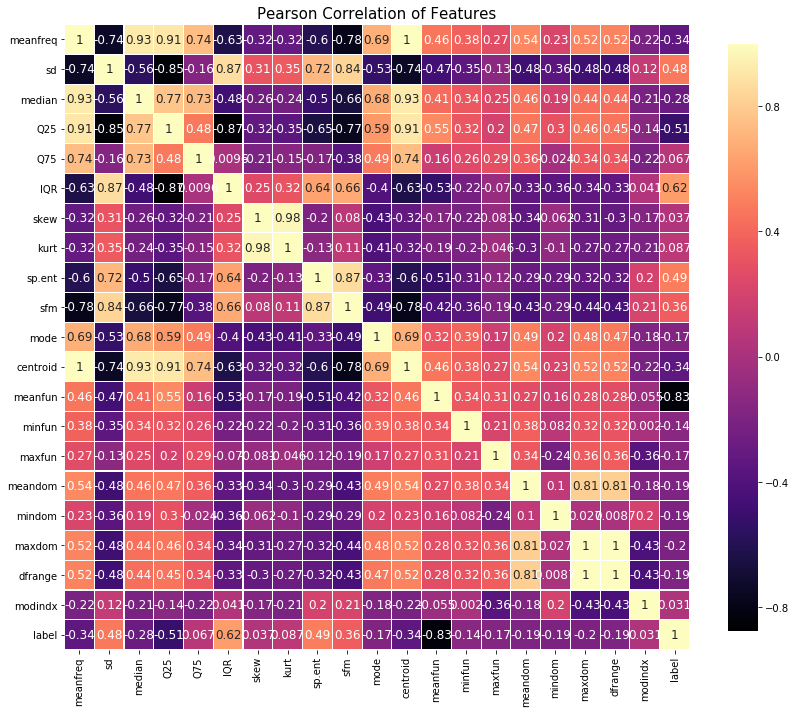

In [12]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = 'magma',
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    
    correlation = df.corr().unstack().sort_values(kind='quicksort')
    print('Highly Correlated Variables')
    return correlation[((correlation>=0.95) | (correlation<=-0.95)) & (correlation!=1)]

correlation_heatmap(df)

In [13]:
d = df.drop(columns={'kurt','skew','dfrange','maxdom'})

## Task 9: Split the newly created data frame into train and test set, scale the features and apply SVM model with rbf kernel to newly created dataframe.

In [14]:
X = d.drop(columns={'label'})
y = d['label']
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3 , random_state = 6)

In [15]:
classifier = SVC(kernel = 'rbf',random_state = 0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print("Accuracy Score:",acc)

Accuracy Score: 0.9831756046267087


## Task 10: Do Hyperparameter Tuning using GridSearchCV and evaluate the model on test data.

In [16]:
from sklearn.model_selection import GridSearchCV
params_dict={'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100],'kernel':['linear','rbf']}
clf=GridSearchCV(estimator=SVC(),param_grid=params_dict,scoring='accuracy',cv=10)
clf.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [17]:
clf.best_score_

0.9797011944070768

In [18]:
clf.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [19]:
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print(accuracy_score(y_pred,y_test))
print("Classification Report: \n", classification_report(y_test,y_pred))
print("Precision Score: ",precision_score(clf.predict(X_test),y_test))

0.9831756046267087
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       478
           1       0.98      0.98      0.98       473

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951

Precision Score:  0.9830866807610994
